In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [ ]:
def calculate_avg_dtw_distance(audio_files):
    # Load the audio files and compute their MFCCs
    mfccs = []
    for file, _ in audio_files:
        y, sr = librosa.load(file, sr=None)  # Load audio file at its original sample rate
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCCs
        mfccs.append(mfcc.T)  # Transpose to make time steps as rows

    # Calculate DTW distance between each pair of audio files
    distances = []
    n = len(mfccs)
    for i in range(n):
        for j in range(i+1, n):
            # Compute DTW between mfccs[i] and mfccs[j]
            distance, _ = fastdtw(mfccs[i], mfccs[j], dist=euclidean)
            distances.append(distance)
    
    # Average the distances
    avg_distance = np.mean(distances)
    return avg_distance

def calculate_avg_dtw_with_reference(reference_file, audio_files):
    # Load the reference audio file and compute its MFCCs
    y_ref, sr_ref = librosa.load(reference_file, sr=None)
    mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr_ref, n_mfcc=13)
    mfcc_ref = mfcc_ref.T  # Transpose to make time steps as rows

    # Calculate DTW distance between the reference file and each file in the list
    distances = []
    for file, _ in audio_files:
        y, sr = librosa.load(file, sr=None)  # Load audio file at its original sample rate
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc = mfcc.T  # Transpose to make time steps as rows
        
        # Compute DTW distance between reference and current file
        distance, _ = fastdtw(mfcc_ref, mfcc, dist=euclidean)
        distances.append(distance)
    
    # Average the distances
    avg_distance = np.mean(distances)
    return avg_distance

def get_file_paths_by_subfolder(root):
    file_dict = {}
    
    # Walk through the root directory
    for subdir, _, files in os.walk(root):
        # Get the subfolder name (last part of the path)
        subfolder_name = os.path.basename(subdir)
        file_pairs = [(os.path.join(subdir, file), os.path.splitext(file)[0]) for file in files]
        
        # Only add the subfolder if it has files
        if file_pairs:
            file_dict[subfolder_name] = file_pairs
    
    return file_dict

In [18]:
file_dictionary = get_file_paths_by_subfolder(r"C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that_no_extra_time")
print(file_dictionary.keys())

dict_keys(['19', '87'])


In [19]:
print(len(file_dictionary["87"]))

103


In [ ]:
avg_dtw = calculate_avg_dtw_distance(file_dictionary['87'])
print(f'Average DTW distance: {avg_dtw}')
# Average DTW distance: 2028.983836453837
# Average DTW distance: 1436.1624143357494 # no begining time
# Average DTW distance: 911.2566748920108 no extra time
# Average DTW distance: 863.8457150850618 before and after


Average DTW distance: 863.8457150850618


In [94]:
avg_dtw = calculate_avg_dtw_distance(file_dictionary['311'])
print(f'Average DTW distance: {avg_dtw}')
# Average DTW distance: 2465.101561976089


Average DTW distance: 1891.0932670210498


In [91]:
avg_dtw = calculate_avg_dtw_with_reference(file_dictionary['311'][0][0], file_dictionary['311'][1:20])
print(f'Average DTW distance with reference: {avg_dtw}')

Average DTW distance with reference: 2094.010914476354


In [ ]:
# Audio Files
# Reader 311
# r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\311\311-124404-0002_1.wav'
# r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\311\311-124404-0005_2.wav'
# r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\311\311-124404-0021_3.wav'

# Reader 87
# r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\87\87-121553-0000_1.wav'
# r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\87\87-121553-0006_1.wav'


In [11]:
# Load audio files and extract MFCC features
y1, sr1 = librosa.load(r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that_no_extra_time\19\19-198-0025_1.wav', sr=None)
# y2, sr2 = librosa.load(r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that\87\87-121553-0006_1.wav',sr=None)
y2, sr2 = librosa.load(r'C:\Computer Science Programs\Fall_2024\EE502_BioMed\project\data\extracted_words\that_no_extra_time\19\19-198-0026_1.wav',sr=None)

print(sr1)
print(sr2)

# Extract MFCCs (you can also use other features like chroma or spectrogram)
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=5)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=5)

# Transpose MFCCs to get a (time, features) shape, which is necessary for DTW
mfcc1 = mfcc1.T
mfcc2 = mfcc2.T

16000
16000


In [12]:
distance, path = fastdtw(mfcc1, mfcc2, dist=euclidean)

print(f"DTW distance: {distance}")

DTW distance: 1015.1061470895706


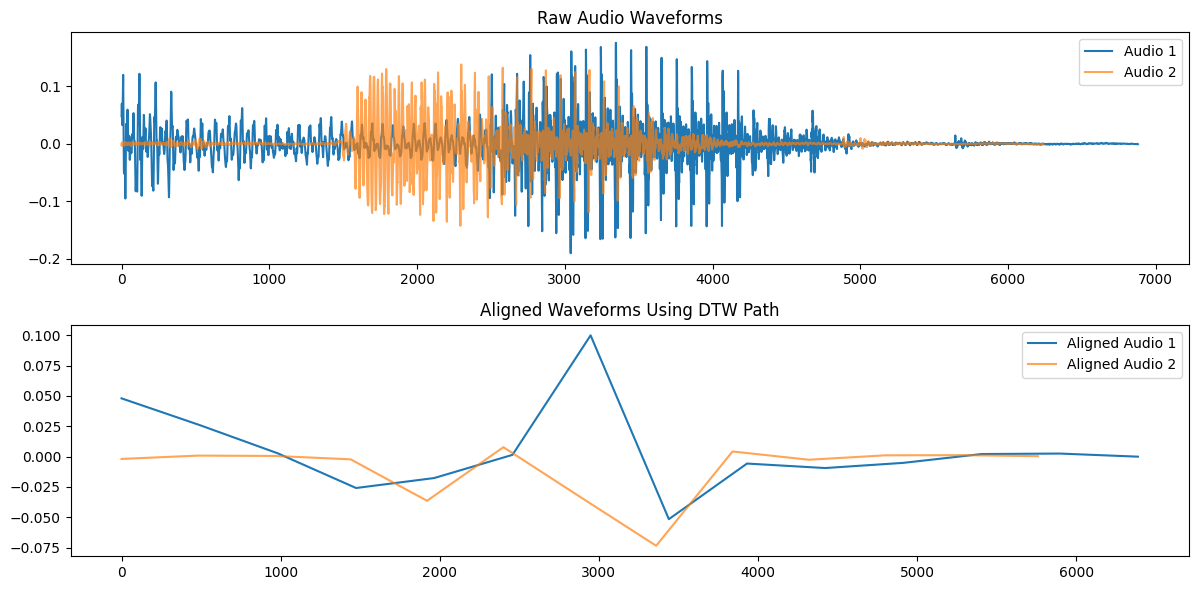

In [13]:
plt.figure(figsize=(12, 6))

# Plot the raw audio waveforms
plt.subplot(2, 1, 1)
plt.plot(y1, label="Audio 1")
plt.plot(y2, label="Audio 2", alpha=0.7)
plt.title("Raw Audio Waveforms")
plt.legend()

# Plot the DTW path on the waveform
plt.subplot(2, 1, 2)
# Extract the time indices from the DTW path
time_indices_1 = [i * len(y1) // len(mfcc1) for i, _ in path]
time_indices_2 = [j * len(y2) // len(mfcc2) for _, j in path]

# Plot the aligned audio waveforms using the DTW path
plt.plot(time_indices_1, y1[time_indices_1], label="Aligned Audio 1")
plt.plot(time_indices_2, y2[time_indices_2], label="Aligned Audio 2", alpha=0.7)
plt.title("Aligned Waveforms Using DTW Path")
plt.legend()

plt.tight_layout()
plt.show()